<a href="https://colab.research.google.com/github/TimotheSchmidt/Biasini-rogue/blob/main/Deep_Learning_Tipeee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#0. Dataset Classification Binaire

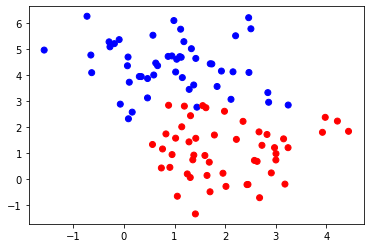

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

In [3]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
y = y.reshape((y.shape[0], 1))
print(y.shape)

(100, 1)


# 1. Perceptron (Vidéo 4)

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [7]:
def forward_propagation(X, W, b):
  Z = X.dot(W) + b
  A = sigmoid(Z)
  return A

In [8]:
def log_loss(y, A):
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [9]:
def gradients(X, A, y):
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)
  return (dW, db)

In [10]:
def optimisation(X, W, b, A, y, learning_rate):
  dW, db = gradients(X, A, y)
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [11]:
def predict(X, W, b):
  A = forward_propagation(X, W, b)
  return A >= 0.5

In [12]:
def perceptron(X, y, learning_rate=0.1, n_iter=100):
  W, b = initialisation(X)
  
  # Training
  for i in range(n_iter):
    A = forward_propagation(X, W, b)
    loss = log_loss(y, A)
    W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
  y_pred = predict(X, W, b)

  return (y_pred, W, b)

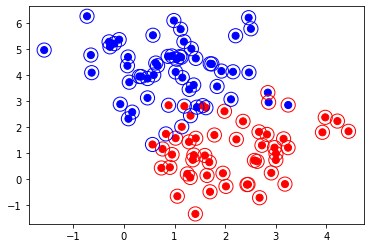

In [13]:
y_pred, W, b = perceptron(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)

plt.scatter(X[np.squeeze(y_pred==True), 0], X[np.squeeze(y_pred==True), 1], cmap='bwr', s=200, facecolor='none', edgecolors='red')
plt.scatter(X[np.squeeze(y_pred==False), 0], X[np.squeeze(y_pred==False), 1], cmap='bwr', s=200, facecolor='none', edgecolors='blue')

## Exercice : tracer la frontiere de décision (vidéo 5)

### option 1 (fonction Mathématique)

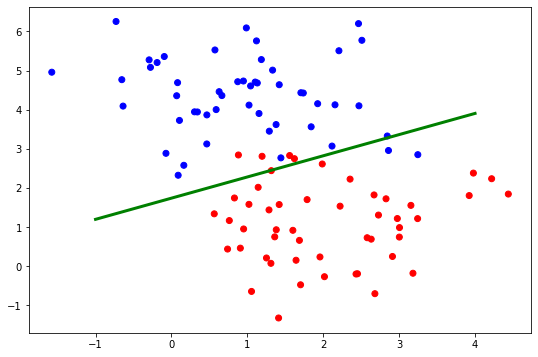

In [ ]:
y_pred, W, b = perceptron(X, y, n_iter=1000)

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='g', lw=3)

### option 2 (meshgrid)

In [ ]:
def affichage(X, y, y_pred, resolution = 100):
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

  #limites du graphique
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # meshgrid
  x1 = np.linspace(xlim[0], xlim[1], resolution)
  x2 = np.linspace(ylim[0], ylim[1], resolution)
  X1, X2 = np.meshgrid(x1, x2)

  # assembler les 2 variables
  XX = np.vstack((X1.ravel(), X2.ravel())).T

  # Prédictions
  Z = predict(XX, W, b)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)
  ax.contour(X1, X2, Z, colors='g')

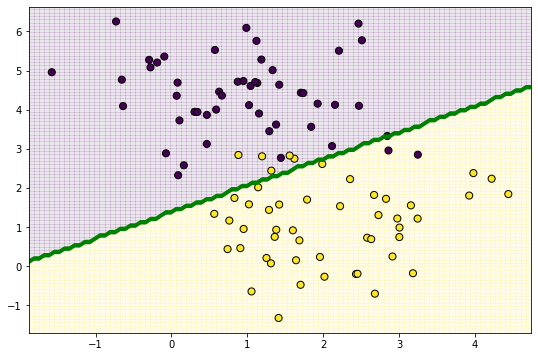

In [ ]:
affichage(X, y, y_pred, resolution=100)

# 2. Classification MultiClasse (vidéo 6)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

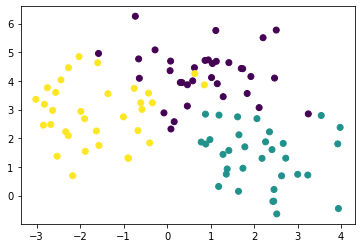

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y)

In [ ]:
y_onehot = LabelBinarizer().fit_transform(y)
y_onehot[:10]

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def initialisation(X, y):
  W = np.random.randn(X.shape[1], y.shape[1])
  b = np.random.randn(1)
  return (W, b)

In [ ]:
def forward_propagation(X, W, b):
  Z = X.dot(W) + b
  A = sigmoid(Z)
  return A

In [ ]:
def cross_entropy(y, A):
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [ ]:
def gradients(X, A, y):
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)
  return (dW, db)

In [ ]:
def optimisation(X, W, b, A, y, learning_rate):
  dW, db = gradients(X, A, y)
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [ ]:
def predict(X, W, b):
  A = forward_propagation(X, W, b)
  return np.argmax(A, axis=1)

In [ ]:
def perceptron(X, y, learning_rate=0.1, n_iter=100):
  W, b = initialisation(X, y)
  loss_hist = []
  
  # Training
  for i in range(n_iter):
    A = forward_propagation(X, W, b)
    loss = cross_entropy(y, A)
    loss_hist.append(loss)
    W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
  y_pred = predict(X, W, b)
  plt.plot(loss_hist)

  return (y_pred, W, b)

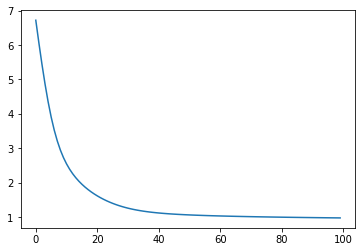

In [ ]:
y_pred, W, b = perceptron(X, y_onehot)

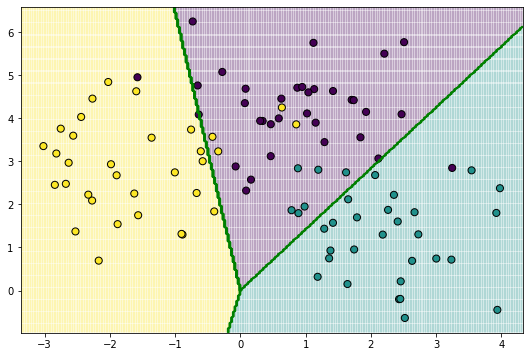

In [ ]:
affichage(X, y, y_pred, resolution=300)

## Application : Classification d'images (digits)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target
images = digits.images

X = MinMaxScaler().fit_transform(X)
y_onehot = LabelBinarizer().fit_transform(y)

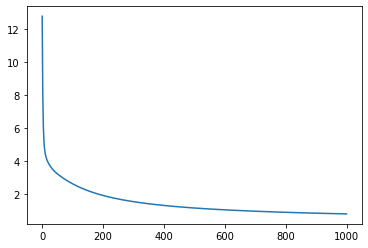

In [ ]:
y_pred, W, b = perceptron(X, y_onehot, n_iter=1000)

In [ ]:
accuracy_score(y, y_pred)

0.9137451307735114

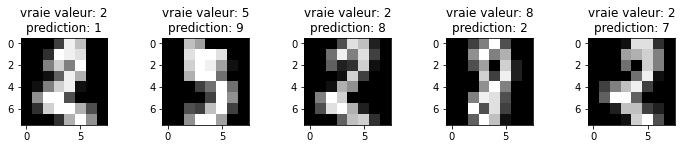

In [ ]:
# Filtrer les prédictions incorrectes
errors_ix = (y_pred != y)
errors_images = images[errors_ix]
errors_pred = y_pred[errors_ix]
y_true_errors = y[errors_ix]

# afficher n images incorrectes
n = 5
fig, ax = plt.subplots(ncols=n, figsize=(n*2, 2))
for i in range(n):
  ax[i].imshow(errors_images[i], cmap='gray')
  ax[i].set_title(f'vraie valeur: {y_true_errors[i]}\nprediction: {errors_pred[i]}')
plt.tight_layout()
plt.show()

# 3. Réseau de neurones 1 Couche

## 3.1 Forward Propagation (vidéo 8)

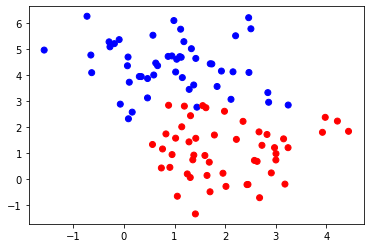

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
plt.scatter(X[0, :], X[1, :], c=y, cmap='bwr')

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def initialisation(n_x, n_h, n_y):
  W1 = np.random.randn(n_h, n_x)
  b1 = np.random.randn(n_h, 1)
  W2 = np.random.randn(n_y, n_h)
  b2 = np.random.randn(n_y, 1)

  params = {'W1': W1,
            'b1': b1,
            'W2': W2,
            'b2': b2
            }

  return params

In [ ]:
def forward_propagation(X, params):
  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']

  Z1 = W1.dot(X) + b1
  A1 = sigmoid(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = sigmoid(Z2)
  
  cache = {
      'A1': A1,
      'A2': A2
  }

  return cache

## 3.2 Backward Propagation (vidéo 10)

In [ ]:
def compute_gradients(X, y, params, cache):

  A1 = cache['A1']
  A2 = cache['A2']
  W2 = params['W2']

  m = y.shape[1]

  dZ2 = A2 - y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
 
  dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)


  gradients = {
      'dW1': dW1,
      'dW2': dW2,
      'db1': db1,
      'db2': db2
  }

  return gradients

In [ ]:
def backward_propagation(X, y, params, cache, learning_rate):

  gradients = compute_gradients(X, y, params, cache)

  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']

  dW1 = gradients['dW1']
  db1 = gradients['db1']
  dW2 = gradients['dW2']
  db2 = gradients['db2']

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  params = {'W1': W1,
            'b1': b1,
            'W2': W2,
            'b2': b2
            }

  return params

In [ ]:
def predict(X, params):
  cache = forward_propagation(X, params)
  A2 = cache['A2']
  return A2 >= 0.5

In [ ]:
def visualisation(X, y, params):
  fig, ax = plt.subplots()
  ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
  x0_lim = ax.get_xlim()
  x1_lim = ax.get_ylim()

  resolution = 100
  x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
  x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)

  # meshgrid
  X0, X1 = np.meshgrid(x0, x1)

  # assemble (100, 100) -> (10000, 2)
  XX = np.vstack((X0.ravel(), X1.ravel()))

  Z = predict(XX, params)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)
  ax.contour(X0, X1, Z, colors='green')

  plt.show()

In [ ]:
def neural_network(X, y, n_h = 32, learning_rate=0.1, n_iter=1000):

  n_x = X.shape[0]
  n_y = y.shape[0]

  params = initialisation(n_x, n_h, n_y)

  for i in range(n_iter):
    cache = forward_propagation(X, params)
    params = backward_propagation(X, y, params, cache, learning_rate)

  y_pred = predict(X, params)
  visualisation(X, y, params)

  return y_pred

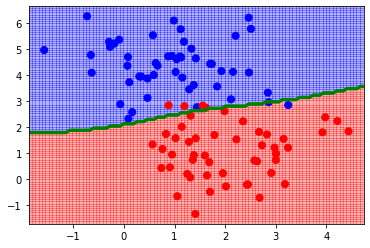

In [ ]:
y_pred = neural_network(X, y, n_iter=1000)

# 4. Réseau de Neurones (L Couches)

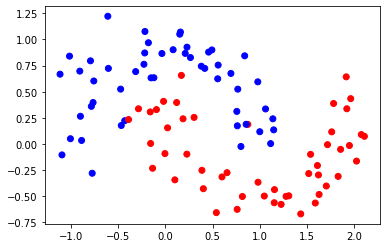

In [ ]:
from sklearn.datasets import make_moons
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X, y = make_moons(n_samples=100, noise=0.2)
X = X.T
y = y.reshape((1, y.shape[0]))
plt.scatter(X[0, :], X[1, :], c=y, cmap='bwr')

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def derivative_sigmoid(x):
  return x * (1 - x)

In [ ]:
def initialisation(layer_dims):
  # layers dims par ex = (X.shape[0], 32, 64, 72, 64, 32, y.shape[0])
  
  params = {}
  L = len(layer_dims) # L = 3

  for l in range(1, L):
    params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
    params['b' + str(l)] = np.random.randn(layer_dims[l], 1)

  return params

In [ ]:
######## TEST
params = initialisation((X.shape[0], 32, 64,  y.shape[0]))

for k, v in params.items():
  print(k, v.shape)

W1 (32, 2)
b1 (32, 1)
W2 (64, 32)
b2 (64, 1)
W3 (1, 64)
b3 (1, 1)


In [ ]:
def forward_propagation(X, params):

  cache = {'A0': X}
  L = len(params) // 2

  for l in range(1, L+1):
    Z = params['W' + str(l)].dot(cache['A' + str(l-1)]) + params['b' + str(l)]
    cache['A' + str(l)] = sigmoid(Z)

  return cache

In [ ]:
######## TEST
cache = forward_propagation(X, params)

for k, v in cache.items():
  print(k, v.shape)

A0 (2, 100)
A1 (32, 100)
A2 (64, 100)
A3 (1, 100)


In [ ]:
def compute_gradients(cache, y, params):

  m = y.shape[1]
  L = len(params) // 2

  dZ = cache['A' + str(L)] - y
  gradients = {}

  for l in reversed(range(1, L+1)):
    gradients['dW' + str(l)] = 1/m * np.dot(dZ, cache['A' + str(l-1)].T)
    gradients['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dZ = np.dot(params['W' + str(l)].T, dZ) * derivative_sigmoid(cache['A' + str(l-1)]) 

  return gradients

In [ ]:
######## TEST
gradients = compute_gradients(cache, y, params)

for k, v in gradients.items():
  print(k, v.shape)

dW3 (1, 64)
db3 (1, 1)
dW2 (64, 32)
db2 (64, 1)
dW1 (32, 2)
db1 (32, 1)


In [ ]:
def backward_propagation(X, y, params, cache, learning_rate):

  gradients = compute_gradients(cache, y, params)

  L = len(params) // 2

  for l in range(1, L+1):
    params['W' + str(l)] = params['W' + str(l)] - learning_rate * gradients['dW' + str(l)]
    params['b' + str(l)] = params['b' + str(l)] - learning_rate * gradients['db' + str(l)]

  return params

In [ ]:
def predict(X, params):
  cache = forward_propagation(X, params)
  L = len(params) // 2
  AL = cache['A' + str(L)]
  return AL >= 0.5

In [ ]:
def visualisation(X, y, params):
  fig, ax = plt.subplots()
  ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
  x0_lim = ax.get_xlim()
  x1_lim = ax.get_ylim()

  resolution = 100
  x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
  x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)

  # meshgrid
  X0, X1 = np.meshgrid(x0, x1)

  # assemble (100, 100) -> (10000, 2)
  XX = np.vstack((X0.ravel(), X1.ravel()))

  Z = predict(XX, params)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)
  ax.contour(X0, X1, Z, colors='green')

  plt.show()

In [ ]:
def neural_network(X, y, layer_dims, learning_rate=0.1, n_iter=1000):

  params = initialisation(layer_dims)

  for i in range(n_iter):
    cache = forward_propagation(X, params)
    params = backward_propagation(X, y, params, cache, learning_rate)

  y_pred = predict(X, params)
  visualisation(X, y, params)

  return y_pred

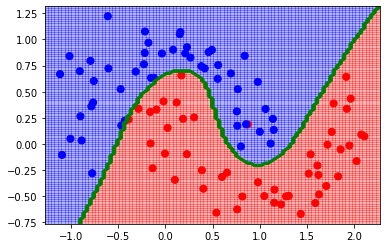

In [ ]:
y_pred = neural_network(X, y, layer_dims=(X.shape[0], 32, 64, 64, 32, y.shape[0]), n_iter=10000)

# 5. Classification Multiple :  Softmax

In [ ]:
def softmax(Z):
  return np.exp(Z) / np.sum(np.exp(Z), axis=0)

In [ ]:
Z = np.array([[14],
              [3],
              [49],
              [-300]])

In [ ]:
softmax(Z)

array([[6.30511676e-016],
       [1.05306174e-020],
       [1.00000000e+000],
       [2.69914251e-152]])

y [1 0 1 0 0 0 2 2 1 0]
y onehot 
 [[0 1 0 1 1 1 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0]]


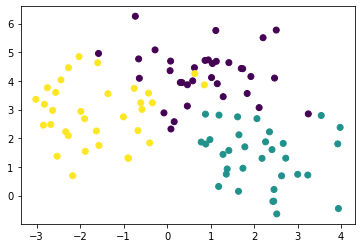

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y)

X = X.T

y_onehot = LabelBinarizer().fit_transform(y)
print('y', y[:10])
# print('y onehot \n', y_onehot[:10])

y_onehot = y_onehot.T
print('y onehot \n', y_onehot[:, :10])

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def derivative_sigmoid(x):
  return x * (1 - x)

In [ ]:
def initialisation(layer_dims):
  # layers dims par ex = (X.shape[0], 32, 64, 72, 64, 32, y.shape[0])
  
  params = {}
  L = len(layer_dims) # L = 3

  for l in range(1, L):
    params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
    params['b' + str(l)] = np.random.randn(layer_dims[l], 1)

  return params

In [ ]:
######## TEST
params = initialisation((X.shape[0], 32, 64,  y.shape[0]))

for k, v in params.items():
  print(k, v.shape)

W1 (32, 100)
b1 (32, 1)
W2 (64, 32)
b2 (64, 1)
W3 (100, 64)
b3 (100, 1)


In [ ]:
def forward_propagation(X, params):

  cache = {'A0': X}
  L = len(params) // 2

  # 1 --- L-1
  for l in range(1, L):
    Z = params['W' + str(l)].dot(cache['A' + str(l-1)]) + params['b' + str(l)]
    cache['A' + str(l)] = sigmoid(Z)

  # L
  Z = params['W' + str(L)].dot(cache['A' + str(L-1)]) + params['b' + str(L)]
  cache['A' + str(L)]= softmax(Z)

  return cache

In [ ]:
######## TEST
cache = forward_propagation(X, params)

for k, v in cache.items():
  print(k, v.shape)

A0 (100, 2)
A1 (32, 2)
A2 (64, 2)
A3 (100, 2)


In [ ]:
def compute_gradients(cache, y, params):

  m = y.shape[1]
  L = len(params) // 2

  dZ = cache['A' + str(L)] - y
  gradients = {}

  for l in reversed(range(1, L+1)):
    gradients['dW' + str(l)] = 1/m * np.dot(dZ, cache['A' + str(l-1)].T)
    gradients['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dZ = np.dot(params['W' + str(l)].T, dZ) * derivative_sigmoid(cache['A' + str(l-1)]) 

  return gradients

In [ ]:
def backward_propagation(X, y, params, cache, learning_rate):

  gradients = compute_gradients(cache, y, params)

  L = len(params) // 2

  for l in range(1, L+1):
    params['W' + str(l)] = params['W' + str(l)] - learning_rate * gradients['dW' + str(l)]
    params['b' + str(l)] = params['b' + str(l)] - learning_rate * gradients['db' + str(l)]

  return params

In [ ]:
def predict(X, params):
  cache = forward_propagation(X, params)
  L = len(params) // 2
  AL = np.argmax(cache['A' + str(L)], axis=0)
  return AL

In [ ]:
def visualisation(X, y, y_original, params):
  fig, ax = plt.subplots()
  ax.scatter(X[0, :], X[1, :], c=y_original, s=50)
  x0_lim = ax.get_xlim()
  x1_lim = ax.get_ylim()

  resolution = 100
  x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
  x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)

  # meshgrid
  X0, X1 = np.meshgrid(x0, x1)

  # assemble (100, 100) -> (10000, 2)
  XX = np.vstack((X0.ravel(), X1.ravel()))

  Z = predict(XX, params)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X0, X1, Z, alpha=0.3, zorder=-1)
  ax.contour(X0, X1, Z, colors='green')

  plt.show()

In [ ]:
def neural_network(X, y, y_original, layer_dims, learning_rate=0.1, n_iter=1000):

  params = initialisation(layer_dims)
  L = len(params)//2
  for i in range(n_iter):
    cache = forward_propagation(X, params)
    params = backward_propagation(X, y, params, cache, learning_rate)

  y_pred = predict(X, params)
  visualisation(X, y, y_original, params)

  print(cache['A' + str(L)][:, 1])

  return y_pred

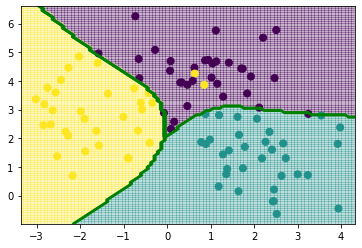

[9.20223522e-01 2.51668734e-06 7.97739609e-02]


In [ ]:
y_pred = neural_network(X, y_onehot, y_original = y, layer_dims=(X.shape[0], 10, 10, y_onehot.shape[0]), n_iter=10000)